In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [34]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        directory = r"/content/drive/MyDrive/Datasets/Train/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 150 images belonging to 2 classes.


In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        directory = r"/content/drive/MyDrive/Datasets/Test/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 150 images belonging to 2 classes.


In [36]:
validation = ImageDataGenerator(rescale=1./255)
vall = test_datagen.flow_from_directory(
        directory = r"/content/drive/MyDrive/Datasets/Val/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 16 images belonging to 2 classes.


Intiallize **CNN**

In [37]:
cnn = tf.keras.models.Sequential()

In [38]:
#Step1:- Convolution 

cnn.add(tf.keras.layers.Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' ))
cnn.add(keras.Input(shape=(64, 64, 3)))

**Pooling**


In [39]:
cnn.add(tf.keras.layers.MaxPool2D( pool_size = 2 , strides = 2))

**Flattening**

In [40]:
cnn.add(tf.keras.layers.Flatten())

Fully **connection**

In [41]:
cnn.add(tf.keras.layers.Dense(units = 128 , activation = 'relu'))

Adding the output **layer**

In [42]:
cnn.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))

Compile the **model**

In [43]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fitting the **model**

In [44]:
history=cnn.fit(x = training_set , validation_data = vall , epochs = 25)

Epoch 1/25
5/5 [==============================] - 3s 412ms/step - loss: 0.7594 - accuracy: 0.6867 - val_loss: 0.3629 - val_accuracy: 1.0000
Epoch 2/25
5/5 [==============================] - 2s 329ms/step - loss: 0.3874 - accuracy: 0.8733 - val_loss: 0.5403 - val_accuracy: 0.5625
Epoch 3/25
5/5 [==============================] - 2s 344ms/step - loss: 0.2514 - accuracy: 0.9067 - val_loss: 0.1233 - val_accuracy: 1.0000
Epoch 4/25
5/5 [==============================] - 2s 357ms/step - loss: 0.1865 - accuracy: 0.9333 - val_loss: 0.0843 - val_accuracy: 1.0000
Epoch 5/25
5/5 [==============================] - 2s 328ms/step - loss: 0.1128 - accuracy: 0.9600 - val_loss: 0.0651 - val_accuracy: 1.0000
Epoch 6/25
5/5 [==============================] - 2s 342ms/step - loss: 0.1072 - accuracy: 0.9733 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 7/25
5/5 [==============================] - 2s 341ms/step - loss: 0.0727 - accuracy: 0.9867 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 8/25
5/5 [====

**Evaluation**

In [45]:
test_loss, test_acc = cnn.evaluate(test_set, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

5/5 - 1s - loss: 0.0109 - accuracy: 1.0000 - 1s/epoch - 223ms/step
The accuracy of the model is:
1.0


Plot the **accuracy**

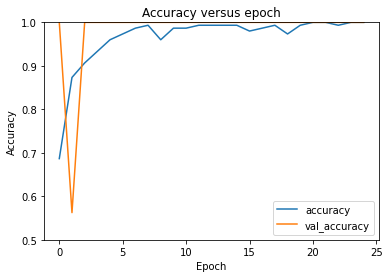

In [46]:
plt.title("Accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

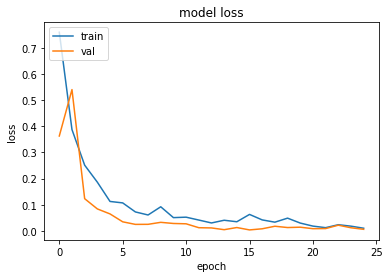

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Predicting**

1/1 [==============================] - 0s 61ms/step
Fresh Apple


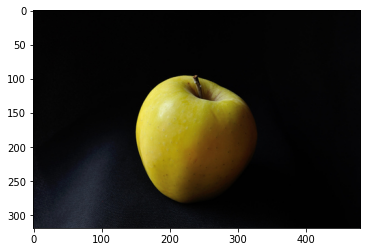

In [48]:
import numpy as np
from keras_preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Datasets/Test/Freshapples/apple_122.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'Fresh Apple'
else:
  prediction = 'Rotten Apple'

print(prediction)

plt.imshow(mpimg.imread('/content/drive/MyDrive/Datasets/Test/Freshapples/apple_122.jpg'))

1/1 [==============================] - 0s 22ms/step
Rotten Apple


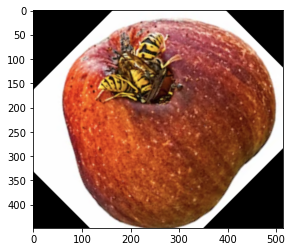

In [49]:
import numpy as np
from keras_preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Datasets/Test/Rottenapples/rotated_by_45_Screen Shot 2018-06-07 at 2.59.52 PM.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'Fresh Apple'
else:
  prediction = 'Rotten Apple'

print(prediction)

plt.imshow(mpimg.imread('/content/drive/MyDrive/Datasets/Test/Rottenapples/rotated_by_45_Screen Shot 2018-06-07 at 2.59.52 PM.png'))
